In [73]:
import pandas as pd
import numpy as np

## 1. 데이터 준비

In [74]:
file_path = "./data/06_(문제)타이타닉_분류_데이터셋.csv"
df = pd.read_csv(file_path)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [76]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


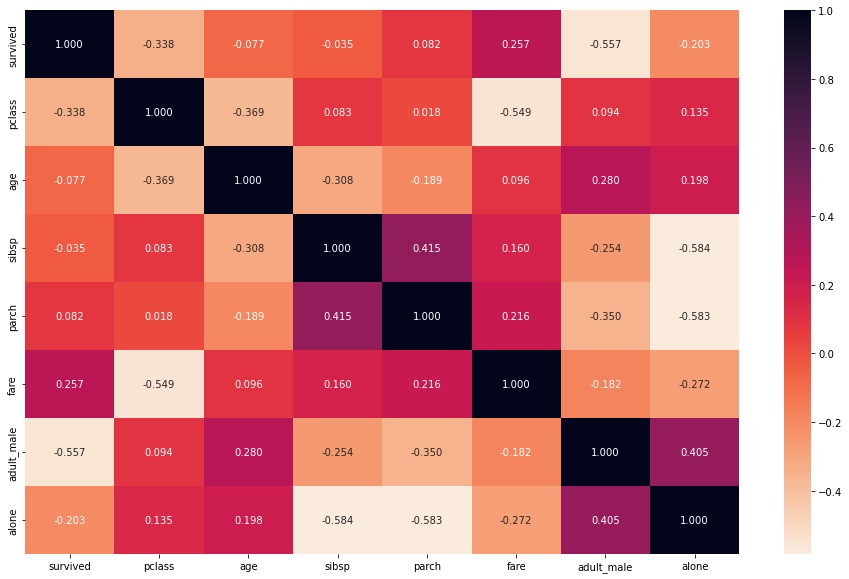

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True, fmt = '.3f', cmap='rocket_r')
plt.show()

In [78]:
# pclass	객실 등급
# survived	생존 유무
# sex	성별
# age	나이
# sibsp	형제 혹은 부부의 수
# parch	부모 혹은 자녀의 수
# fare	지불한 요금

In [79]:
# 분류분석 : 객실 등급, 성별, 나이, 지불한 요금에 따른 생존률

### 독립변수 : 객실등급. 성별, 나이, 지불한요금
### 종속변수 : 생존률

In [80]:
### 결측치 처리하기
# 사용할 독립변수를 기준으로 결측치가 있는 모든 행들 삭제하기
df = df.dropna(subset=['survived','pclass', 'sex', 'age','fare']).reset_index(drop=True)
# 행렬의 차원으로 데이터 형태 조회
print(df.shape)
df.columns

(714, 15)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## 2. 데이터 전처리

In [81]:
### 사용할 독립변수 추출하기
# 보통 분석 시에는 범주형 데이터를 연속형 데이터로 변경
# 남/여 -> 1/0 원핫 인코딩하기

df_x = df[["pclass", "sex", "age", "fare"]]
df_x.head()

,pclass,sex,age,fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [83]:
df_x.loc[:, "sex"] = LabelEncoder().fit_transform(df_x["sex"])
df_x

C:\Users\admin\AppData\Local\Temp\ipykernel_14240\629555541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x.loc[:, "sex"] = LabelEncoder().fit_transform(df_x["sex"])


,pclass,sex,age,fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
709,3,0,39.0,29.1250
710,2,1,27.0,13.0000
711,1,0,19.0,30.0000
712,1,1,26.0,30.0000


In [84]:
df_input = df_x[['pclass', 'sex', 'age','fare']].to_numpy()
df_input

array([[ 3.    ,  1.    , 22.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    , 19.    , 30.    ],
       [ 1.    ,  1.    , 26.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  7.75  ]])

In [85]:
df_target = df['survived'].to_numpy()
df_target

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [86]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(df_input, df_target, random_state=42)
    

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(535, 4)
(535,)
(179, 4)
(179,)


## 생존 여부 예측 방법 4가지
### 1. K-최근접이웃(KNN, 이웃값 조정)
### 2. 로지스틱 회귀분류(이진분류)
### 3. 확률적 경사 하강법(SGD)
### 4. 결정트리